<a href="https://colab.research.google.com/github/Krishna-Dhawangale/Machine-Learning-Practical/blob/main/CS23032_Lab4_Extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Krishna Dhawangale Assignment 4

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
path="/content/drive/MyDrive/ML_Data/Developer_Performance_dataset_1000 - Developer_Performance_dataset_1000.csv"
df=pd.read_csv(path)
df.head(5)

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors,Task_Success_Rate
0,7,416,9,7,6,5.9,92,7,99,10.5,20,3,34
1,4,269,16,13,5,5.1,85,2,100,9.5,17,8,36
2,11,439,3,0,2,6.2,38,2,55,18.3,35,2,79
3,8,472,15,9,4,4.2,26,5,30,12.6,28,4,94
4,5,265,19,16,5,8.1,82,6,82,7.0,25,9,33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Coding         1000 non-null   int64  
 1   Lines_of_Code        1000 non-null   int64  
 2   Bugs_Found           1000 non-null   int64  
 3   Bugs_Fixed           1000 non-null   int64  
 4   AI_Usage_Hours       1000 non-null   int64  
 5   Sleep_Hours          1000 non-null   float64
 6   Cognitive_Load       1000 non-null   int64  
 7   Coffee_Intake        1000 non-null   int64  
 8   Stress_Level         1000 non-null   int64  
 9   Task_Duration_Hours  1000 non-null   float64
 10  Commits              1000 non-null   int64  
 11  Errors               1000 non-null   int64  
 12  Task_Success_Rate    1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB


In [6]:
df.shape

(1000, 13)

In [7]:
df.describe()

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors,Task_Success_Rate
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.84000,356.23400,9.876000,7.153000,2.961000,6.465800,56.933000,3.368000,66.410000,8.700100,17.253000,4.544000,56.578000
std,3.15854,188.15535,5.796052,5.468226,2.021278,1.439529,21.767506,2.342234,21.865452,5.992891,10.836901,2.820997,20.814879
min,1.00000,26.00000,0.000000,0.000000,0.000000,4.000000,20.000000,0.000000,30.000000,0.500000,1.000000,0.000000,30.000000
25%,3.00000,209.50000,5.000000,2.000000,1.000000,5.200000,38.000000,1.000000,48.000000,4.000000,9.000000,2.000000,37.000000
50%,6.00000,332.00000,10.000000,7.000000,3.000000,6.400000,57.000000,3.000000,66.000000,7.450000,14.000000,5.000000,55.500000
75%,9.00000,480.50000,15.000000,12.000000,5.000000,7.700000,76.000000,5.000000,86.000000,12.000000,23.000000,7.000000,74.000000
max,11.00000,993.00000,19.000000,19.000000,6.000000,9.000000,94.000000,7.000000,100.000000,27.500000,50.000000,9.000000,100.000000


In [8]:
df.columns

Index(['Hours_Coding', 'Lines_of_Code', 'Bugs_Found', 'Bugs_Fixed',
       'AI_Usage_Hours', 'Sleep_Hours', 'Cognitive_Load', 'Coffee_Intake',
       'Stress_Level', 'Task_Duration_Hours', 'Commits', 'Errors',
       'Task_Success_Rate'],
      dtype='object')

In [9]:
df.isnull().any().any()

np.False_

In [10]:
df.isnull().sum()

,0
Hours_Coding,0
Lines_of_Code,0
Bugs_Found,0
Bugs_Fixed,0
AI_Usage_Hours,0
Sleep_Hours,0
Cognitive_Load,0
Coffee_Intake,0
Stress_Level,0
Task_Duration_Hours,0


In [11]:
#print missing value
df[df.isnull().any(axis=1)]

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors,Task_Success_Rate


In [12]:
df.drop('number', axis=1, inplace=True, errors='ignore')
df.columns

Index(['Hours_Coding', 'Lines_of_Code', 'Bugs_Found', 'Bugs_Fixed',
       'AI_Usage_Hours', 'Sleep_Hours', 'Cognitive_Load', 'Coffee_Intake',
       'Stress_Level', 'Task_Duration_Hours', 'Commits', 'Errors',
       'Task_Success_Rate'],
      dtype='object')

In [13]:
df.shape

(1000, 13)

In [14]:
before_rows=df.shape[0]
df = df.dropna()
after_rows = df.shape[0]
print("Before rows:",before_rows)
print("After rows:",after_rows)
print("The number of dropped rows are:",before_rows-after_rows)


Before rows: 1000
After rows: 1000
The number of dropped rows are: 0


In [15]:
df.shape

(1000, 13)

In [17]:
clean_data = df.copy()
# clean_data ['high_humidity_label'] = (clean_data['relative_humidity_3pm']>24.99)*1
# print(clean_data['high_humidity_label'])

In [18]:
clean_data.columns

Index(['Hours_Coding', 'Lines_of_Code', 'Bugs_Found', 'Bugs_Fixed',
       'AI_Usage_Hours', 'Sleep_Hours', 'Cognitive_Load', 'Coffee_Intake',
       'Stress_Level', 'Task_Duration_Hours', 'Commits', 'Errors',
       'Task_Success_Rate'],
      dtype='object')

In [19]:
clean_data.drop('relative_humidity_9am', axis=1, inplace=True, errors='ignore')
clean_data.drop('relative_humidity_3pm', axis=1, inplace=True, errors='ignore')
clean_data.columns

Index(['Hours_Coding', 'Lines_of_Code', 'Bugs_Found', 'Bugs_Fixed',
       'AI_Usage_Hours', 'Sleep_Hours', 'Cognitive_Load', 'Coffee_Intake',
       'Stress_Level', 'Task_Duration_Hours', 'Commits', 'Errors',
       'Task_Success_Rate'],
      dtype='object')

In [20]:
X=clean_data.iloc[:,:-1]
print(X)

     Hours_Coding  Lines_of_Code  Bugs_Found  Bugs_Fixed  AI_Usage_Hours  \
0               7            416           9           7               6   
1               4            269          16          13               5   
2              11            439           3           0               2   
3               8            472          15           9               4   
4               5            265          19          16               5   
..            ...            ...         ...         ...             ...   
995            10            660          14          13               0   
996             9            484          13          11               1   
997             2            128           4           0               3   
998             8            266           5           3               1   
999             8            604          16          15               3   

     Sleep_Hours  Cognitive_Load  Coffee_Intake  Stress_Level  \
0            5.9      

In [21]:
Y=clean_data.iloc[:,-1]
print(Y)

0      34
1      36
2      79
3      94
4      33
       ..
995    80
996    78
997    74
998    51
999    90
Name: Task_Success_Rate, Length: 1000, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
X_train

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
541,3,178,0,0,1,8.1,28,0,39,3.8,7,0
440,6,226,5,2,2,5.2,21,2,30,9.9,8,9
482,5,388,4,1,6,5.4,68,1,74,2.8,11,9
422,1,176,8,3,3,6.4,84,3,98,0.8,7,4
778,5,340,17,15,0,6.3,24,4,42,8.1,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
106,8,236,17,15,3,6.0,61,4,73,4.0,27,0
270,8,228,5,3,2,8.8,23,5,30,19.2,26,5
860,1,102,19,14,2,5.9,51,3,62,1.4,6,3
435,7,189,17,12,0,8.1,26,0,45,4.1,14,2


In [24]:
X_test

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
521,3,234,5,3,2,8.4,63,5,81,1.7,5,4
737,2,254,5,1,6,6.6,86,4,100,2.3,12,8
740,5,266,13,9,4,6.4,84,3,84,6.5,14,2
660,5,140,3,0,0,8.1,60,3,76,11.7,20,3
411,8,810,2,0,6,8.0,43,5,55,10.4,30,7
...,...,...,...,...,...,...,...,...,...,...,...,...
468,4,168,8,6,3,4.4,60,5,73,7.2,15,9
935,4,210,2,0,2,7.9,34,0,45,3.7,14,1
428,9,646,8,2,2,8.3,94,7,100,11.5,11,1
7,3,234,5,1,6,5.8,78,2,86,2.9,15,2


In [25]:
Y_train

,Task_Success_Rate
541,85
440,80
482,50
422,30
778,74
...,...
106,43
270,79
860,52
435,84


In [26]:
Y_test

,Task_Success_Rate
521,39
737,36
740,36
660,49
411,82
...,...
468,49
935,77
428,30
7,40


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler = scaler.transform(X_test)

In [28]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

[Text(0.5416666666666666, 0.9285714285714286, 'x[6] <= 1.108\ngini = 0.959\nsamples = 700\nvalue = [120, 10, 8, 9, 10, 6, 6, 5, 6, 13, 11, 9, 14\n13, 7, 8, 9, 3, 10, 6, 9, 13, 16, 9, 9, 5\n12, 8, 11, 6, 9, 8, 12, 13, 10, 6, 4, 11, 3\n8, 7, 11, 14, 11, 11, 10, 9, 5, 12, 16, 6, 8\n7, 8, 7, 10, 7, 14, 4, 7, 9, 5, 7, 6, 2, 5\n3, 2, 3, 2, 7]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[6] <= -0.216\ngini = 0.983\nsamples = 569\nvalue = [20.0, 4.0, 3.0, 5.0, 5.0, 6.0, 3.0, 5.0, 4.0, 11.0\n9.0, 9.0, 12.0, 13.0, 7.0, 8.0, 9.0, 3.0, 10.0, 6.0\n9.0, 13.0, 16.0, 9.0, 9.0, 5.0, 12.0, 8.0, 11.0, 6.0\n9.0, 8.0, 12.0, 13.0, 10.0, 6.0, 4.0, 11.0, 3.0, 8.0\n7.0, 11.0, 14.0, 11.0, 11.0, 10.0, 9.0, 5.0, 12.0\n16.0, 6.0, 8.0, 7.0, 8.0, 7.0, 10.0, 7.0, 14.0, 4.0\n7.0, 9.0, 5.0, 7.0, 6.0, 2.0, 5.0, 3.0, 2.0, 3.0\n2.0, 7.0]'),
 Text(0.4375, 0.8571428571428572, 'True  '),
 Text(0.16666666666666666, 0.6428571428571429, 'x[8] <= -0.868\ngini = 0.974\nsamples = 319\nvalue = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

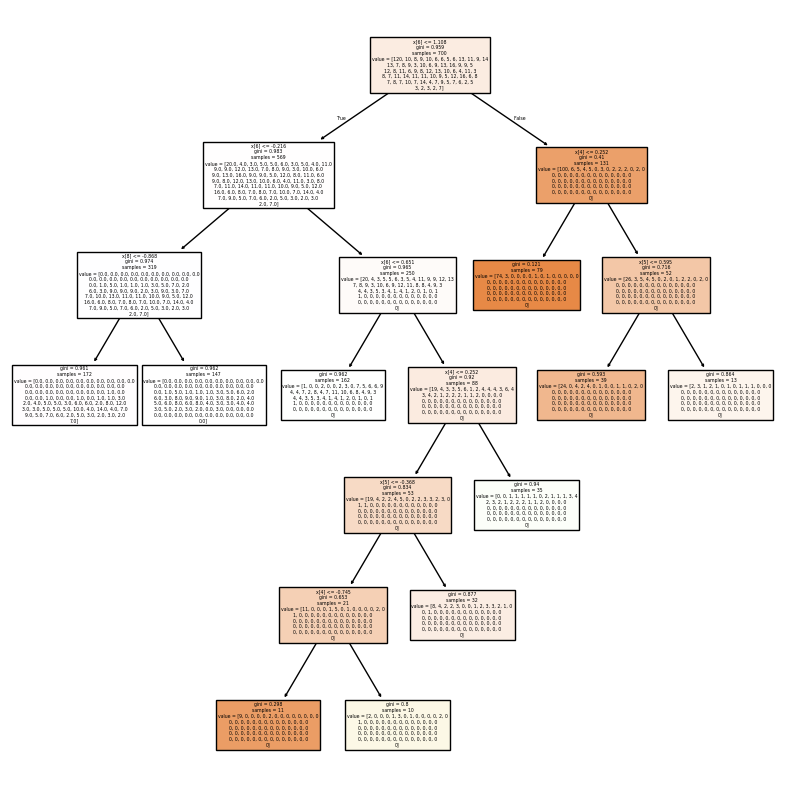

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(humidity_classifier, filled=True)